# 1\. Introdução
A Udemy é uma plataforma online de ensino que possui mais de 200 mil cursos abrangendo em torno de 75 idiomas. Neste notebook irei realizar uma análise dos cursos da Udemy.

#TODO  
Criar dashboard no **Power BI** ou **Tableau**.  
Usar SQL?

# 2\. Bibliotecas e Datasets

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Polygon

In [53]:
# Dataset
udemy_cursos = pd.read_csv('data/udemy_cursos.csv') # https://www.kaggle.com/datasets/hossaingh/udemy-courses

In [54]:
udemy_cursos.head(5)

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


# 3\. Dataset Udemy

Nesta seção será realizada a análise do dataset da Udemy

## 3\.1 Analisando o dataset

In [55]:
udemy_cursos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  209734 non-null  float64
 1   title               209734 non-null  object 
 2   is_paid             209734 non-null  bool   
 3   price               209734 non-null  float64
 4   headline            209707 non-null  object 
 5   num_subscribers     209734 non-null  float64
 6   avg_rating          209734 non-null  float64
 7   num_reviews         209734 non-null  float64
 8   num_comments        209734 non-null  float64
 9   num_lectures        209734 non-null  float64
 10  content_length_min  209734 non-null  float64
 11  published_time      209734 non-null  object 
 12  last_update_date    209597 non-null  object 
 13  category            209734 non-null  object 
 14  subcategory         209734 non-null  object 
 15  topic               208776 non-nul

In [56]:
udemy_cursos.isna().sum()

id                      0
title                   0
is_paid                 0
price                   0
headline               27
num_subscribers         0
avg_rating              0
num_reviews             0
num_comments            0
num_lectures            0
content_length_min      0
published_time          0
last_update_date      137
category                0
subcategory             0
topic                 958
language                0
course_url              0
instructor_name         5
instructor_url        427
dtype: int64

In [57]:
# Altera a maneira que o Pandas mostra as colunas
pd.set_option('display.max_columns', 0) # default:0, None mostra todas as colunas
pd.set_option('display.max_colwidth', 50) # defaul:50, None mostra o conteúdo completo das colunas

In [58]:
# Converte os tipos de dados
udemy_cursos['num_subscribers'] = udemy_cursos['num_subscribers'].astype(int)
udemy_cursos['num_reviews'] = udemy_cursos['num_reviews'].astype(int)
udemy_cursos['num_comments'] = udemy_cursos['num_comments'].astype(int)
udemy_cursos['num_lectures'] = udemy_cursos['num_lectures'].astype(int)
udemy_cursos['num_lectures'] = udemy_cursos['num_lectures'].astype(int)
udemy_cursos['content_length_min'] = udemy_cursos['content_length_min'].astype(int)
udemy_cursos['published_time'] = pd.to_datetime(udemy_cursos['published_time'], dayfirst=False, errors = 'coerce')
udemy_cursos['last_update_date'] = pd.to_datetime(udemy_cursos['last_update_date'], format='%Y-%m-%d', errors = 'raise')

In [59]:
# Preenche os campos nulos
udemy_cursos = (udemy_cursos.fillna('-'))

In [60]:
udemy_cursos.dtypes

id                                float64
title                              object
is_paid                              bool
price                             float64
headline                           object
num_subscribers                     int32
avg_rating                        float64
num_reviews                         int32
num_comments                        int32
num_lectures                        int32
content_length_min                  int32
published_time        datetime64[ns, UTC]
last_update_date                   object
category                           object
subcategory                        object
topic                              object
language                           object
course_url                         object
instructor_name                    object
instructor_url                     object
dtype: object

In [61]:
udemy_cursos.head()

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231,3.75,134,42,37,1268,2010-08-05 22:06:13+00:00,2020-11-06 00:00:00,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474,4.50,709,112,9,88,2010-01-12 18:09:46+00:00,-,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713,4.40,41,13,14,82,2010-10-13 18:07:17+00:00,2019-10-09 00:00:00,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988,4.80,395,88,36,1511,2011-06-20 20:08:38+00:00,2016-01-13 00:00:00,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266,4.75,38,12,38,569,2011-06-23 18:31:20+00:00,-,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


In [62]:
# Mostra as linhas que possuem campo nulo
udemy_cursos[udemy_cursos['last_update_date'].isna()]

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url


In [63]:
udemy_cursos.columns

Index(['id', 'title', 'is_paid', 'price', 'headline', 'num_subscribers',
       'avg_rating', 'num_reviews', 'num_comments', 'num_lectures',
       'content_length_min', 'published_time', 'last_update_date', 'category',
       'subcategory', 'topic', 'language', 'course_url', 'instructor_name',
       'instructor_url'],
      dtype='object')

In [64]:
# Mostra a quantidade de cursos por categoria
udemy_cursos['category'].value_counts()

Development             31643
IT & Software           30479
Teaching & Academics    26293
Business                24670
Personal Development    21239
Design                  15256
Health & Fitness        11568
Marketing               11221
Lifestyle               10653
Finance & Accounting    10572
Office Productivity      6297
Music                    5977
Photography & Video      3866
Name: category, dtype: int64

In [65]:
# Mostra a quantidade de cursos por idioma
udemy_cursos['language'].value_counts().head(10)

English       123921
Portuguese     18471
Spanish        17428
Turkish         8100
Japanese        7006
German          6101
French          5465
Arabic          5197
Italian         3637
Russian         2686
Name: language, dtype: int64

## 3\.2 Visualizando o dataset

### Preço

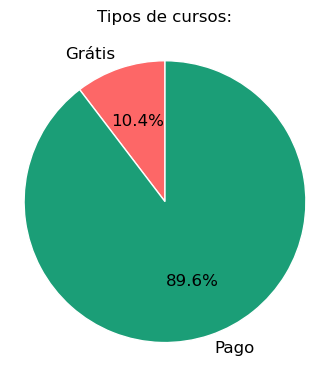

In [66]:
# Visualização em pizza da porcentagem de cursos grátis e pagos.
plt.figure(figsize = (4, 4))
plt.pie(udemy_cursos.groupby(['is_paid']).size(),
        labels = ['Grátis', 'Pago'], 
        autopct = '%1.1f%%',
        startangle = 90, colors = ['#fd6767','#1b9e77'],
        textprops = {'size': 12},
        wedgeprops= {"edgecolor":"white",
                     'linewidth': 1,
                     'antialiased': True})
plt.axis('equal')
plt.title('Tipos de cursos:\n',loc='center', fontdict={'fontsize': 12})

plt.show()

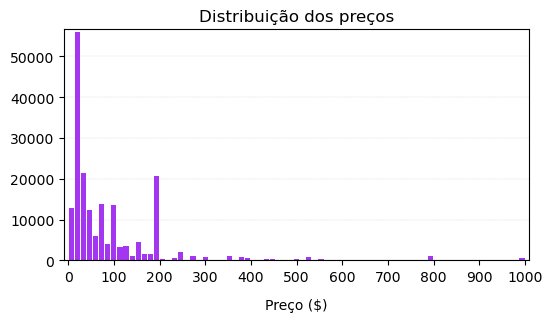

In [67]:
# Distribuição dos preços dos cursos
plt.figure(figsize = (6, 3), dpi=100)
plt.hist(udemy_cursos[udemy_cursos['is_paid']==True]['price'], bins=75, rwidth=0.85, color='#A435F0')
#sns.histplot(data=udemy_cursos[udemy_cursos['is_paid']==True], x='price', bins=75, color='#A435F0')
plt.grid(axis='y', color ='Grey', linestyle ='-.', linewidth = 0.1)
plt.xticks(range(0,1001,100))
plt.margins(0.01)
plt.xlabel("Preço ($)", labelpad=10)
plt.ylabel("")
plt.title('Distribuição dos preços',loc='center', fontdict={'fontsize': 12})

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)    # tamanho da fonte dos rótulos do eixo x e y
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo x
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo y
plt.rc('legend', fontsize=SMALL_SIZE)    # tamanho da fonte da legenda
plt.show()

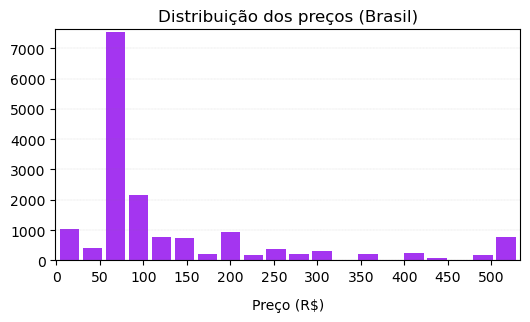

In [68]:
# Distribuição dos preços dos cursos em Português
plt.figure(figsize = (6, 3))
plt.hist(udemy_cursos[(udemy_cursos['is_paid']==True) & (udemy_cursos['language']=='Portuguese')]['price'],
         bins=20,
         rwidth=0.85,
         color='#A435F0')
plt.grid(axis='y', color ='Grey', linestyle ='-.', linewidth = 0.1)
plt.xticks(range(0,551,50))
plt.margins(0.01)
plt.xlabel("Preço (R$)", labelpad=10)
plt.ylabel("")
plt.title('Distribuição dos preços (Brasil)',loc='center', fontdict={'fontsize': 12})

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)    # tamanho da fonte dos rótulos do eixo x e y
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo x
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo y
plt.rc('legend', fontsize=SMALL_SIZE)    # tamanho da fonte da legenda
plt.show()

### Idioma

In [69]:
# Top 10 idiomas por curso
udemy_c = (udemy_cursos.groupby(['language'], as_index=False)
           .size()
           .sort_values(by='size',ascending=False)
           .rename(columns={'language':'Idioma', 'size':'Quantidade'}))
print('Top 10 cursos por idioma:')
print(udemy_c[:10].to_markdown(tablefmt="rounded_outline", index=False))

Top 10 cursos por idioma:
╭────────────┬──────────────╮
│ Idioma     │   Quantidade │
├────────────┼──────────────┤
│ English    │       123921 │
│ Portuguese │        18471 │
│ Spanish    │        17428 │
│ Turkish    │         8100 │
│ Japanese   │         7006 │
│ German     │         6101 │
│ French     │         5465 │
│ Arabic     │         5197 │
│ Italian    │         3637 │
│ Russian    │         2686 │
╰────────────┴──────────────╯


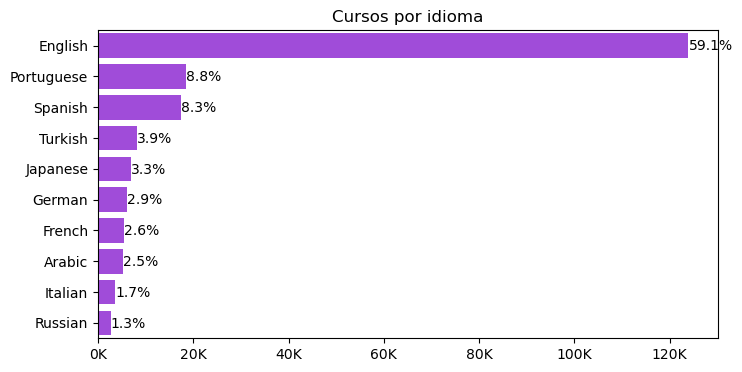

In [70]:
# Top 10 idiomas por curso em gráfico
fig, ax = plt.subplots(figsize=(8, 4)) 
sns.countplot(data=udemy_cursos, y='language', order=udemy_cursos['language'].value_counts().index[:10], color='#A435F0')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.xlabel("")
plt.ylabel("")
plt.title("Cursos por idioma", fontdict={'fontsize': 12})

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)    # tamanho da fonte dos rótulos do eixo x e y
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo x
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo y
plt.rc('legend', fontsize=SMALL_SIZE)    # tamanho da fonte da legenda

# orcentagem
total = len(udemy_cursos['language'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height() - 0.25
        ax.annotate(percentage, (x, y))
      
plt.show()

#sns.barplot(data=udemy_c[:10], x='Quantidade', y='Idioma', orient='h', color='#A435F0')

### Duração

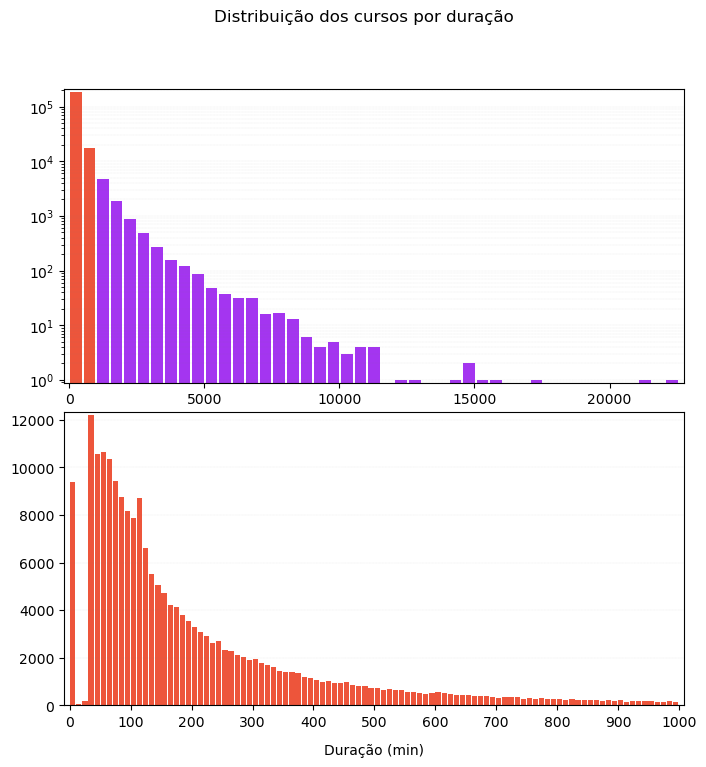

In [71]:
# Distribuição da duração dos cursos
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (8, 8))
N, bins, patches = ax1.hist(udemy_cursos['content_length_min'], rwidth=0.85, bins=45, color='#A435F0')

ax1.grid(axis='y', color ='Grey', linestyle ='-.', linewidth = 0.1, which='both', alpha = 0.6)
ax1.margins(0.01)

patches[0].set_facecolor('#ed553b')
patches[1].set_facecolor('#ed553b')

plt.sca(ax1)
plt.yscale('log')
plt.ylabel("")

ax2.hist(udemy_cursos[udemy_cursos['content_length_min']<1000]['content_length_min'], rwidth=0.85, bins=100, color='#ed553b')
ax2.grid(axis='y', color ='Grey', linestyle ='-.', linewidth = 0.1, alpha = 0.6)
ax2.margins(0.01)

plt.sca(ax2)
plt.xlabel("Duração (min)", labelpad=10)
plt.ylabel("")
plt.xticks(range(0,1001,100))
plt.subplots_adjust(hspace=0.1)
plt.suptitle('Distribuição dos cursos por duração')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)    # tamanho da fonte dos rótulos do eixo x e y
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo x
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo y
plt.rc('legend', fontsize=SMALL_SIZE)    # tamanho da fonte da legenda
plt.show()

### Categoria

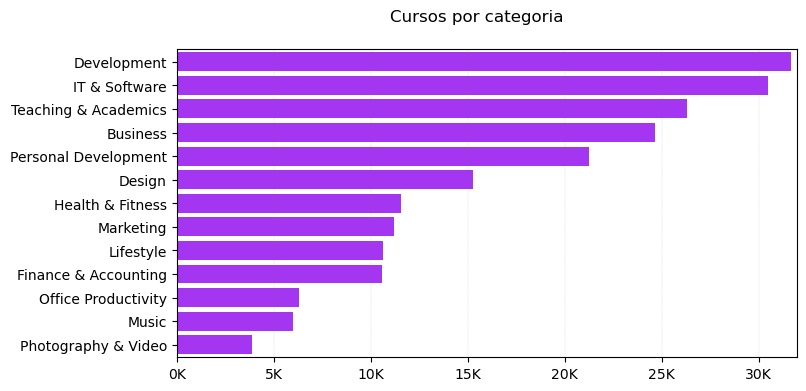

In [72]:
# Categoria pela quantidade de cursos
udemy_a = udemy_cursos.groupby(['category']).size().sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(8, 4)) 
ax.barh(udemy_a.index, udemy_a, color='#A435F0')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.margins(0.01)
plt.grid(axis='x', color ='Grey',
        linestyle ='-.', linewidth = 0.1)
plt.suptitle('Cursos por categoria')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)   # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)   # legend fontsize
plt.show()

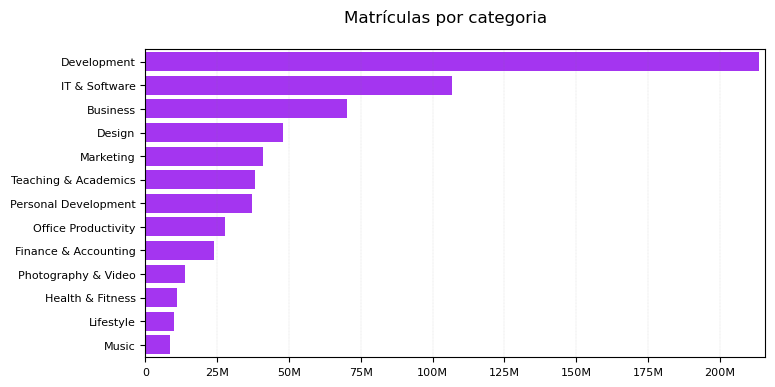

In [73]:
# Categoria pela quantidade de matriculados
udemy_b = udemy_cursos.groupby(['category']).sum(numeric_only=True).sort_values(by='num_subscribers',ascending=True)
fig, ax = plt.subplots(figsize=(8, 4)) 
ax.barh(udemy_b.index, udemy_b['num_subscribers'], color='#A435F0')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M' if x!=0 else 0))
plt.margins(0.01)
plt.grid(axis='x', color ='Grey',
        linestyle ='-.', linewidth = 0.1)
plt.suptitle('Matrículas por categoria')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)   # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)   # legend fontsize
plt.show()

### Matriculados

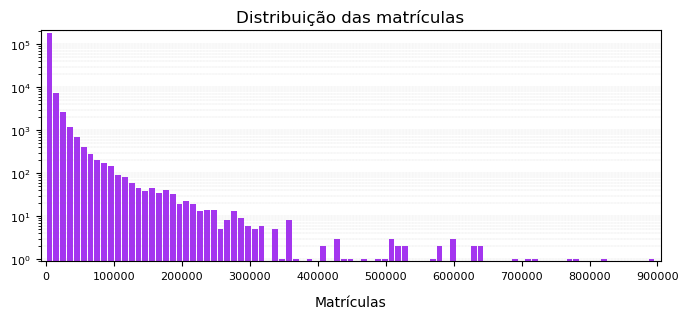

In [74]:
# Distribuição dos matriculados por curso
plt.figure(figsize = (8, 3))
plt.hist(udemy_cursos[(udemy_cursos['num_subscribers']>0) & (udemy_cursos['num_subscribers']<1e6)]['num_subscribers'],
         bins=89, 
         rwidth=0.85, 
         color='#A435F0')
plt.grid(axis='y', color ='Grey', which='both', linestyle ='-.', linewidth = 0.1)
plt.xticks(range(0,1000001,100000))
plt.margins(0.01)
plt.xlabel("Matrículas", labelpad=10)
plt.yscale('log')
plt.title('Distribuição das matrículas',loc='center')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)    # tamanho da fonte dos rótulos do eixo x e y
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo x
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo y
plt.rc('legend', fontsize=SMALL_SIZE)    # tamanho da fonte da legenda
plt.show()

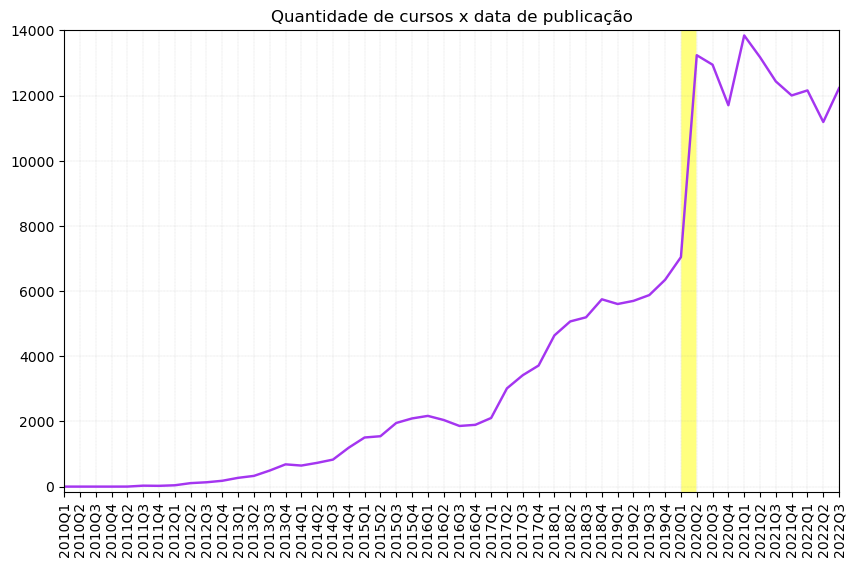

In [75]:
# Quantidade de cursos pela data
udemy_cursos['published_QDate'] = pd.PeriodIndex(udemy_cursos.published_time, freq='Q')
udemy_publish = udemy_cursos.groupby(['published_QDate'], as_index=False).size().sort_values(by='published_QDate')
udemy_publish['published_QDate'] = udemy_publish['published_QDate'].apply(str)
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(udemy_publish.index[:-1], udemy_publish['size'][:-1], color='#A435F0', linewidth=1.75)
plt.margins(x=0, y=0.012)
#plt.ylabel("Quantidade de cursos", labelpad=5, fontsize=12)
#plt.xlabel("Data de publicação", labelpad=10, fontsize=12)
plt.xticks(udemy_publish.index[:-1])
plt.xticks(rotation = 90)

ax.set_xticklabels(list(udemy_publish['published_QDate'][:-1]))
plt.grid(color ='Grey',
        linestyle ='-.', linewidth = 0.1)

# cria uma linha amarela entre os vértices 39 e 40 para destaque
verts = [(udemy_publish.index[39], -1000), (udemy_publish.index[39], udemy_publish['size'][39]+10000), 
         (udemy_publish.index[40], udemy_publish['size'][40]+10000),(udemy_publish.index[40], -1000)]
poly = Polygon(verts, facecolor ='yellow',
               edgecolor ='1.0', alpha = 0.5)
ax.add_patch(poly)

plt.title('Quantidade de cursos x data de publicação',loc='center', fontdict={'fontsize': 12})
plt.show()

### Top 10

In [77]:
# Top 10  tópico por quantidade de cursos
udemy_topic = (udemy_cursos.groupby(['topic'], as_index=False)
           .size()
           .sort_values(by='size',ascending=False)
           .rename(columns={'topic':'Tópico', 'size':'Quantidade'}))
print('Top 10 tópicos por quantidade de cursos:')
print(udemy_topic[:10].to_markdown(tablefmt="rounded_outline", index=False))

Top 10 tópicos por quantidade de cursos:
╭─────────────────────────┬──────────────╮
│ Tópico                  │   Quantidade │
├─────────────────────────┼──────────────┤
│ Python                  │         2553 │
│ Excel                   │         2072 │
│ English Language        │         1495 │
│ WordPress               │         1442 │
│ Math                    │         1341 │
│ Photoshop               │         1294 │
│ Microsoft Certification │         1232 │
│ Java                    │         1128 │
│ JavaScript              │         1092 │
│ Personal Development    │          978 │
╰─────────────────────────┴──────────────╯


In [78]:
# Top 10 tópico por matriculas
udemy_subs = (udemy_cursos.groupby(['topic'], as_index=False)
              .sum(numeric_only=True)
              .sort_values(by='num_subscribers',ascending=False)
              .rename(columns={'topic':'Tópico', 'num_subscribers': 'Matrículas'}))
print('Top 10 tópicos por quantidade de matrículas:')
print(udemy_subs[:10][['Tópico', 'Matrículas']].to_markdown(tablefmt="rounded_outline", index=False,floatfmt=',.0f'))

Top 10 tópicos por quantidade de matrículas:
╭─────────────────────┬──────────────╮
│ Tópico              │   Matrículas │
├─────────────────────┼──────────────┤
│ Python              │     32516280 │
│ Excel               │     12822452 │
│ JavaScript          │     11801744 │
│ Java                │     11203723 │
│ Web Development     │      9293697 │
│ Photoshop           │      8976024 │
│ Ethical Hacking     │      8280273 │
│ WordPress           │      7080627 │
│ CSS                 │      6482557 │
│ Android Development │      5567763 │
╰─────────────────────┴──────────────╯


In [79]:
my_cols = ['title', 'instructor_name', 'price', 'num_reviews', 'num_subscribers', 'num_comments', 'content_length_min']

def top5_courses(df, col):
    top5_df = df.nlargest(5, col).reset_index(drop=True)
    return top5_df[my_cols]

In [81]:
top5_courses(udemy_cursos, 'num_reviews')

,title,instructor_name,price,num_reviews,num_subscribers,num_comments,content_length_min
0,2022 Complete Python Bootcamp From Zero to Her...,Jose Portilla,199.99,436457,1612862,39040,1333
1,Microsoft Excel - Excel from Beginner to Advanced,Kyle Pew,149.99,332598,1108811,36101,1264
2,The Web Developer Bootcamp 2022,Colt Steele,199.99,246624,823805,31001,3827
3,The Complete 2022 Web Development Bootcamp,Dr. Angela Yu,199.99,228108,771176,27723,3939
4,Angular - The Complete Guide (2022 Edition),Maximilian Schwarzmüller,189.99,172991,626304,24886,2082


In [82]:
# Top 10 cursos por quantidade de avaliações
udemy_review = (udemy_cursos.groupby(['title'], as_index=False)
              .sum(numeric_only=True)
              .sort_values(by='num_reviews',ascending=False)
              .rename(columns={'title':'Título', 'num_reviews': 'Avaliações'}))
print('Top 10 tópicos por quantidade de matrículas:')
print(udemy_review[:10][['Título', 'Avaliações']].to_markdown(tablefmt="rounded_outline", index=False,floatfmt=',.0f'))

Top 10 tópicos por quantidade de matrículas:
╭──────────────────────────────────────────────────────────────┬──────────────╮
│ Título                                                       │   Avaliações │
├──────────────────────────────────────────────────────────────┼──────────────┤
│ 2022 Complete Python Bootcamp From Zero to Hero in Python    │       436607 │
│ Microsoft Excel - Excel from Beginner to Advanced            │       332598 │
│ The Web Developer Bootcamp 2022                              │       246624 │
│ The Complete 2022 Web Development Bootcamp                   │       228108 │
│ Angular - The Complete Guide (2022 Edition)                  │       172991 │
│ Java Programming Masterclass covering Java 11 & Java 17      │       170478 │
│ React - The Complete Guide (incl Hooks, React Router, Redux) │       163324 │
│ Machine Learning A-Z™: Hands-On Python & R In Data Science   │       162432 │
│ The Complete Digital Marketing Course - 12 Courses in 1      │       1549

In [352]:
# Função para gerar os Top 10
def top10_courses(df, col):
    col_map = {
        'num_reviews': 'Avaliações',
        'num_subscribers': 'Matrículas',
        'num_comments': 'Comentários'
    }
    col_newname = col_map.get(col)
    if not col_newname:
        return "Coluna não existe."
    
    renamed_columns = {'title': 'Curso', 'instructor_name': 'Instrutor', 'avg_rating': 'Nota', col: col_newname}
    top10_df = df.sort_values(col, ascending=False).reset_index(drop=True)[:10]
    
    print(f"Top 10 cursos por quantidade de {col_newname}")
    print((top10_df[['title', 'instructor_name', 'avg_rating', col]]
           .rename(columns=renamed_columns)
           .to_markdown(tablefmt="rounded_outline", index=False,floatfmt=',.0f')))


In [353]:
top10_courses(udemy_cursos, 'num_reviews')

Top 10 Cursos por quantidade de Avaliações
╭──────────────────────────────────────────────────────────────┬───────────────────────────────────────┬────────┬──────────────╮
│ Curso                                                        │ Instrutor                             │   Nota │   Avaliações │
├──────────────────────────────────────────────────────────────┼───────────────────────────────────────┼────────┼──────────────┤
│ 2022 Complete Python Bootcamp From Zero to Hero in Python    │ Jose Portilla                         │      5 │       436457 │
│ Microsoft Excel - Excel from Beginner to Advanced            │ Kyle Pew                              │      5 │       332598 │
│ The Web Developer Bootcamp 2022                              │ Colt Steele                           │      5 │       246624 │
│ The Complete 2022 Web Development Bootcamp                   │ Dr. Angela Yu                         │      5 │       228108 │
│ Angular - The Complete Guide (2022 Edition)         

In [354]:
top10_courses(udemy_cursos, 'num_subscribers')

Top 10 Cursos por quantidade de Matrículas
╭────────────────────────────────────────────────────────────┬─────────────────┬────────┬──────────────╮
│ Curso                                                      │ Instrutor       │   Nota │   Matrículas │
├────────────────────────────────────────────────────────────┼─────────────────┼────────┼──────────────┤
│ Java Tutorial for Complete Beginners                       │ John Purcell    │      4 │      1752364 │
│ 2022 Complete Python Bootcamp From Zero to Hero in Python  │ Jose Portilla   │      5 │      1612862 │
│ Microsoft Excel - Excel from Beginner to Advanced          │ Kyle Pew        │      5 │      1108811 │
│ Automate the Boring Stuff with Python Programming          │ Al Sweigart     │      5 │      1056369 │
│ Machine Learning A-Z™: Hands-On Python & R In Data Science │ Kirill Eremenko │      5 │       896340 │
│ The Web Developer Bootcamp 2022                            │ Colt Steele     │      5 │       823805 │
│ Introducti

In [356]:
top10_courses(udemy_cursos, 'num_comments')

Top 10 Cursos por quantidade de Comentários
╭────────────────────────────────────────────────────────────┬──────────────────────────┬────────┬───────────────╮
│ Curso                                                      │ Instrutor                │   Nota │   Comentários │
├────────────────────────────────────────────────────────────┼──────────────────────────┼────────┼───────────────┤
│ 2022 Complete Python Bootcamp From Zero to Hero in Python  │ Jose Portilla            │      5 │         39040 │
│ Microsoft Excel - Excel from Beginner to Advanced          │ Kyle Pew                 │      5 │         36101 │
│ The Web Developer Bootcamp 2022                            │ Colt Steele              │      5 │         31001 │
│ The Complete 2022 Web Development Bootcamp                 │ Dr. Angela Yu            │      5 │         27723 │
│ The Complete Digital Marketing Course - 12 Courses in 1    │ Rob Percival             │      5 │         27540 │
│ Angular - The Complete Guide (2022

In [25]:
# Vendas
udemy_cursos['earned'] = udemy_cursos['price']*udemy_cursos['num_subscribers']
print("Total de vendas da Udemy: ", end='')
print(round(udemy_cursos.earned.sum()/1e9,2),'bilhões de dólares')

Total de vendas da Udemy: 59.93 bilhões de dólares


In [26]:
udemy_teacher = udemy_cursos.groupby(['instructor_url'], as_index=False).sum(numeric_only=True)
udemy_teacher2 = (udemy_teacher.sort_values(by='earned',ascending=False)
                  .join(udemy_cursos[['instructor_url', 'instructor_name']].set_index('instructor_url'), on='instructor_url').drop_duplicates()
                  .rename(columns={'instructor_name':'Professor', 'instructor_url':'URL do professor', 'earned':'Lucro'}))
print('Top 10 professores com maior lucro ($):')
print(udemy_teacher2[0:10][['Professor', 'URL do professor', 'Lucro']].to_markdown(tablefmt="rounded_outline", index=False,floatfmt=',.0f'))

Top 10 professores com maior lucro ($):
╭────────────────────────┬─────────────────────────────────────────────┬───────────────╮
│ Professor              │ URL do professor                            │         Lucro │
├────────────────────────┼─────────────────────────────────────────────┼───────────────┤
│ Srinidhi Ranganathan   │ /user/srinidhi-ranganathan/                 │ 1,735,131,640 │
│ Learn Tech Plus        │ /user/josh-werner/                          │ 1,198,360,878 │
│ TJ Walker              │ /user/tjwalker2/                            │ 1,171,615,935 │
│ Jose Portilla          │ /user/joseportilla/                         │   818,904,784 │
│ YouAccel Training      │ /user/youaccel/                             │   801,222,163 │
│ Creative Online School │ /user/mahbubur-rahman-9/                    │   638,075,198 │
│ Robert (Bob) Steele    │ /user/c91d6786-95f3-48d8-ab94-cc92431d2aa4/ │   629,703,391 │
│ Kirill Eremenko        │ /user/kirilleremenko/                      

In [27]:
reviews = udemy_cursos[['title','num_reviews','num_lectures','topic']]

reviews
#df.groupby(['Courses','Fee']).count()

,title,num_reviews,num_lectures,topic
0,Online Vegan Vegetarian Cooking School,134,37,Vegan Cooking
1,The Lean Startup Talk at Stanford E-Corner,709,9,Lean Startup
2,"How To Become a Vegan, Vegetarian, or Flexitarian",41,14,Vegan Cooking
3,How to Train a Puppy,395,36,Pet Training
4,Web Design from the Ground Up,38,38,Web Design
...,...,...,...,...
209729,Let's Speak Urdu - The Urdu Grammar,0,5,Urdu Language
209730,CompTIA Linux+ (XKO-004/005 # 2 Practice Exam ...,0,0,CompTIA Linux+
209731,CISSP 4 full exams #1 : All CISSP domains - 12...,0,0,CISSP - Certified Information Systems Security...
209732,JD Edwards EnterpriseOne Fixed Assets Accounti...,0,9,Financial Accounting


<AxesSubplot: xlabel='num_lectures', ylabel='num_reviews'>

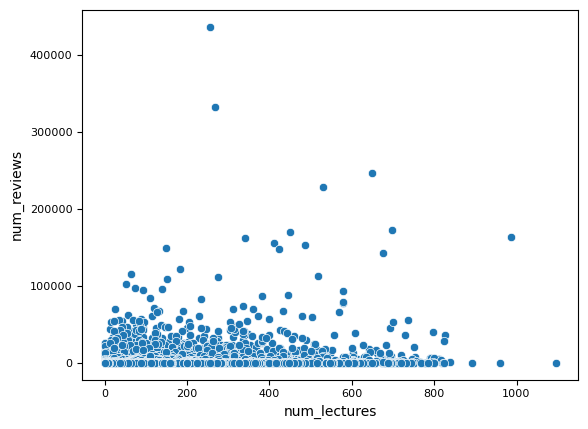

In [28]:
sns.scatterplot(x = 'num_lectures', y = 'num_reviews', data = reviews)

In [29]:
curso = udemy_cursos.groupby(['topic','num_subscribers'])['num_reviews'].sum().sort_values(ascending=False)

curso2 = udemy_cursos.groupby(['topic']).agg({'num_reviews':'sum','num_subscribers':'sum'}).reset_index().sort_values(by=['num_subscribers'],ascending=False).head(10)
curso2
#df.groupby(['Courses','Fee']).count()

,topic,num_reviews,num_subscribers
2795,Python,2670370,32516280
1200,Excel,1409273,12822452
1794,JavaScript,904265,11801744
1779,Java,944527,11203723
3676,Web Development,1060685,9293697
2618,Photoshop,371352,8976024
1193,Ethical Hacking,385783,8280273
3735,WordPress,295251,7080627
569,CSS,432756,6482557
213,Android Development,344513,5567763


<AxesSubplot: xlabel='num_reviews', ylabel='num_subscribers'>

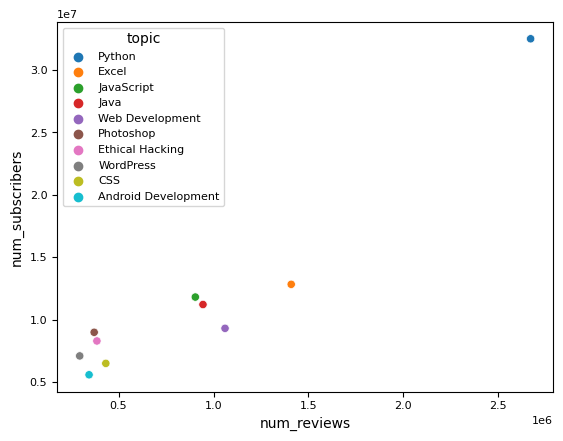

In [30]:
sns.scatterplot(x = 'num_reviews', y = 'num_subscribers', data = curso2, hue='topic')
# Muitos que compram um curso de Python tende a terminá-lo/avaliá-lo
# Os cursos de Web Development e Photoshop possuem quantidades semelhantes de cursos comprados,
# O curso de Photoshop possui bem menos avaliações se comparado ao de Web Development
# Muitos alunos de Photoshop tendem a comprar mas não terminar/avaliar o curso.

Text(0.5, 1.0, 'Assunto por Quantidade')

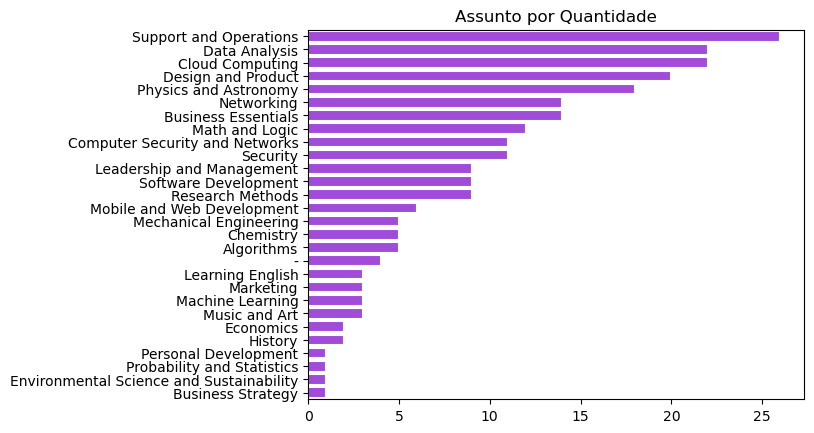

In [54]:
sns.barplot(x = 'counts', y = 'category-subject-area', data = coursera_category, color='#A435F0', edgecolor='white', linewidth=1.5)
plt.xlabel("")
plt.ylabel("")
plt.title("Assunto por Quantidade")

# Exportando os dados

In [56]:
# Exporta o dataset final
udemy_cursos.to_csv('data/udemy_cursos_final.csv', sep =';', index=False)